Enter CSV file path: /Users/dduru/PythonProjects/data/height_age_sex/teen_data.csv


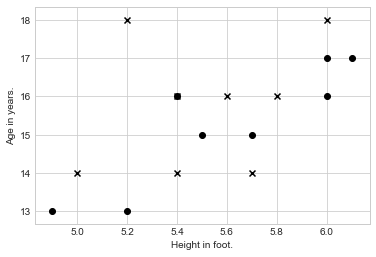

Enter Height and Age for evaluation: 5.3 19
Distances: [3.08058436 6.00083328 5.01597448 2.11896201 1.22065556 3.0016662
 5.0009999  6.01331855 5.00899191 3.04138127 2.15406592 3.01496269
 4.00499688 1.00498756 3.0016662  4.01995025]
K Nearest: ['female' 'female' 'male']
Prediction: female
Enter Height and Age for evaluation: 5.7 13
Distances: [3.01496269 0.5        1.         4.01123422 5.00899191 3.01496269
 1.04403065 0.8        1.22065556 3.0016662  4.01995025 3.0016662
 2.00997512 5.02493781 3.01496269 2.        ]
K Nearest: ['male' 'male' 'female']
Prediction: male


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter


def plot_data(X, Y, Z):
    style_plot()
    
    # Plot visual representation of X, Y, Z
    for i, data in enumerate(zip(X, Y)):
        plt.scatter(data[0], data[1], c='k', marker='o' if Z[i] == 'male' else 'x')
    
    plt.show()


def style_plot():
    plt.style.use('seaborn-whitegrid')
    plt.figure()
    plt.xlabel('Height in foot.')
    plt.ylabel('Age in years.')


def read_data(path):
    frame = pd.read_csv(path)
    return frame['Height'].values, frame['Age'].values, frame['Sex'].values


def read_test_input():
    return [float(x) for x in input('Enter Height and Age for evaluation: ').split()]


def evaluate_nearest(X, Y, x, y, verbose=False):
    euclidean_distances = np.sqrt((X - x)**2  + (Y - y)**2)
    if verbose:
        print(f'Distances: {euclidean_distances}')
    
    nearest_neighbor_indices = euclidean_distances.argsort()[:3]
    nearest_neighbor_sexes = np.take(Z, nearest_neighbor_indices)
    
    if verbose:
        print(f'K Nearest: {nearest_neighbor_sexes}')
        
    return most_common(nearest_neighbor_sexes) 


def most_common(nearest_neighbors):
    counts = Counter(nearest_neighbors)
    return counts.most_common()[0][0]



file_path = input('Enter CSV file path: ')
X, Y, Z = read_data(file_path)


plot_data(X, Y, Z)


x, y = read_test_input()
while x != -1:
    prediction = evaluate_nearest(X, Y, x, y, True)
    print(f'Prediction: {prediction}')
    x, y = read_test_input()

